Initial filtering of TPM matrix

Gene-level filters:
1. Require genes to have TPM >0.1 in >10 samples (Polo’s script filtered things with median TPM=0. I think that is less strict. For our analysis we can use this stricter criteria)
2. Filter genes with mean expression TPM > 5000 (mostly mitochondrial)
3. QC Plot: plot mean TPM vs. variance TPM for all genes.


Sample-level filters:
QC Plot: Visualize sample-sample correlation matrix. Remove any obvious outliers


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
tissue = "Adipose-Subcutaneous"
# tissue = "Skin-Sun_Exposed__Lower_leg"

EXPRFILE = "/storage/polo/GTEx_v8_European_only/%s_Euro/cleaned_tpm.csv"%tissue
expr = pd.read_csv(EXPRFILE, index_col="Name")

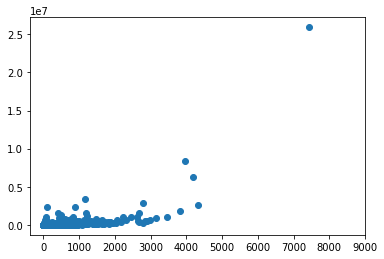

In [81]:
means = expr.mean(axis=1)
varss = expr.var(axis=1)

genedata = pd.DataFrame({"gene": expr.index, "mean": means, "var": varss})

# Outlier genes seem to be mitochondrial
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(genedata["mean"], genedata["var"])
# plt.xticks(np.arange(0, 70000, 5000))
plt.xticks(np.arange(0, 10000, 1000))



# Filter outlier genes
expr = expr[means<10000]

In [83]:
sample_corr.shape

(492, 492)

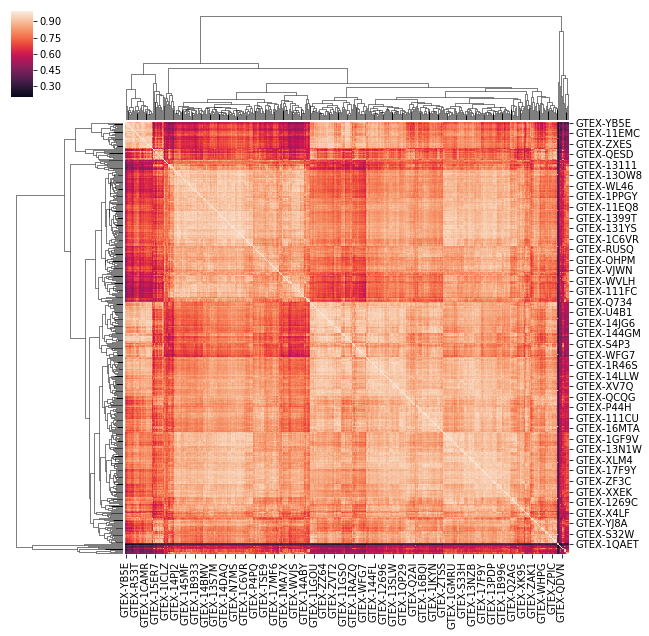

In [82]:
sample_corr = expr.corr()
import seaborn as sns
sns.clustermap(sample_corr)

In [ ]:
from scipy import stats
sample_corr[(np.abs(stats.zscore(sample_corr)) < 3).all(axis=1)]

In [89]:
from scipy import stats
expr.T[(np.abs(stats.zscore(expr.T)) < 3).all(axis=1)]

Name,ENSG00000186092.4,ENSG00000187634.11,ENSG00000188976.10,ENSG00000187961.13,ENSG00000187583.10,ENSG00000187642.9,ENSG00000188290.10,ENSG00000187608.8,ENSG00000188157.14,ENSG00000237330.2,...,ENSG00000099725.14,ENSG00000114374.12,ENSG00000067048.16,ENSG00000183878.15,ENSG00000154620.5,ENSG00000165246.13,ENSG00000012817.15,ENSG00000198692.9,ENSG00000198786.2,ENSG00000198695.2


In [84]:
sample_corr

,GTEX-111CU,GTEX-111FC,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-11DXX,GTEX-11DZ1,GTEX-11EI6,GTEX-11EM3,...,GTEX-ZVT4,GTEX-ZVZP,GTEX-ZXES,GTEX-ZXG5,GTEX-ZYFD,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYY3,GTEX-ZZ64,GTEX-ZZPU
GTEX-111CU,1.000000,0.804504,0.817002,0.887942,0.848904,0.698621,0.849469,0.889019,0.865375,0.767344,...,0.872211,0.948169,0.803918,0.872201,0.762012,0.861419,0.743959,0.695575,0.879352,0.859832
GTEX-111FC,0.804504,1.000000,0.819972,0.794568,0.665035,0.500252,0.627031,0.888551,0.935810,0.611597,...,0.849229,0.871555,0.595824,0.928791,0.839350,0.927777,0.770478,0.533790,0.691665,0.753418
GTEX-111VG,0.817002,0.819972,1.000000,0.759562,0.710087,0.658924,0.687123,0.844389,0.878930,0.623713,...,0.877726,0.799674,0.654021,0.845310,0.763042,0.855554,0.748181,0.656854,0.728757,0.744947
GTEX-111YS,0.887942,0.794568,0.759562,1.000000,0.922040,0.730703,0.850950,0.849956,0.890313,0.897666,...,0.867362,0.879669,0.890231,0.863162,0.735501,0.837527,0.706558,0.745434,0.909844,0.945927
GTEX-1122O,0.848904,0.665035,0.710087,0.922040,1.000000,0.823613,0.937086,0.774084,0.811246,0.915162,...,0.821761,0.804078,0.945722,0.744575,0.643636,0.770268,0.637756,0.837711,0.921800,0.946339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYT6,0.861419,0.927777,0.855554,0.837527,0.770268,0.686009,0.742168,0.904503,0.934785,0.693118,...,0.902670,0.896603,0.749136,0.947472,0.813427,1.000000,0.763932,0.714982,0.822370,0.825079
GTEX-ZYVF,0.743959,0.770478,0.748181,0.706558,0.637756,0.524352,0.622238,0.790901,0.767756,0.566775,...,0.821872,0.738947,0.564059,0.722271,0.807327,0.763932,1.000000,0.537938,0.646004,0.665973
GTEX-ZYY3,0.695575,0.533790,0.656854,0.745434,0.837711,0.939491,0.838302,0.753464,0.699359,0.786855,...,0.728256,0.686060,0.913018,0.637214,0.575276,0.714982,0.537938,1.000000,0.878069,0.833827
GTEX-ZZ64,0.879352,0.691665,0.728757,0.909844,0.921800,0.857560,0.925454,0.851808,0.817079,0.861590,...,0.821439,0.873594,0.952339,0.795874,0.691339,0.822370,0.646004,0.878069,1.000000,0.916313


In [74]:
sample_corr['GTEX-QDVN']

GTEX-111CU    0.560098
GTEX-111FC    0.642595
GTEX-111VG    0.512982
GTEX-111YS    0.595252
GTEX-1122O    0.483131
                ...   
GTEX-ZYT6     0.574839
GTEX-ZYVF     0.520047
GTEX-ZYY3     0.381574
GTEX-ZZ64     0.510000
GTEX-ZZPU     0.565124
Name: GTEX-QDVN, Length: 492, dtype: float64

In [73]:
sample_corr

,GTEX-111CU,GTEX-111FC,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-11DXX,GTEX-11DZ1,GTEX-11EI6,GTEX-11EM3,...,GTEX-ZVT4,GTEX-ZVZP,GTEX-ZXES,GTEX-ZXG5,GTEX-ZYFD,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYY3,GTEX-ZZ64,GTEX-ZZPU
GTEX-111CU,1.000000,0.804504,0.817002,0.887942,0.848904,0.698621,0.849469,0.889019,0.865375,0.767344,...,0.872211,0.948169,0.803918,0.872201,0.762012,0.861419,0.743959,0.695575,0.879352,0.859832
GTEX-111FC,0.804504,1.000000,0.819972,0.794568,0.665035,0.500252,0.627031,0.888551,0.935810,0.611597,...,0.849229,0.871555,0.595824,0.928791,0.839350,0.927777,0.770478,0.533790,0.691665,0.753418
GTEX-111VG,0.817002,0.819972,1.000000,0.759562,0.710087,0.658924,0.687123,0.844389,0.878930,0.623713,...,0.877726,0.799674,0.654021,0.845310,0.763042,0.855554,0.748181,0.656854,0.728757,0.744947
GTEX-111YS,0.887942,0.794568,0.759562,1.000000,0.922040,0.730703,0.850950,0.849956,0.890313,0.897666,...,0.867362,0.879669,0.890231,0.863162,0.735501,0.837527,0.706558,0.745434,0.909844,0.945927
GTEX-1122O,0.848904,0.665035,0.710087,0.922040,1.000000,0.823613,0.937086,0.774084,0.811246,0.915162,...,0.821761,0.804078,0.945722,0.744575,0.643636,0.770268,0.637756,0.837711,0.921800,0.946339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYT6,0.861419,0.927777,0.855554,0.837527,0.770268,0.686009,0.742168,0.904503,0.934785,0.693118,...,0.902670,0.896603,0.749136,0.947472,0.813427,1.000000,0.763932,0.714982,0.822370,0.825079
GTEX-ZYVF,0.743959,0.770478,0.748181,0.706558,0.637756,0.524352,0.622238,0.790901,0.767756,0.566775,...,0.821872,0.738947,0.564059,0.722271,0.807327,0.763932,1.000000,0.537938,0.646004,0.665973
GTEX-ZYY3,0.695575,0.533790,0.656854,0.745434,0.837711,0.939491,0.838302,0.753464,0.699359,0.786855,...,0.728256,0.686060,0.913018,0.637214,0.575276,0.714982,0.537938,1.000000,0.878069,0.833827
GTEX-ZZ64,0.879352,0.691665,0.728757,0.909844,0.921800,0.857560,0.925454,0.851808,0.817079,0.861590,...,0.821439,0.873594,0.952339,0.795874,0.691339,0.822370,0.646004,0.878069,1.000000,0.916313


In [66]:
def normalize_quantiles(M, inplace=False):
    """
    Note: replicates behavior of R function normalize.quantiles from library("preprocessCore")

    Reference:
        [1] Bolstad et al., Bioinformatics 19(2), pp. 185-193, 2003

    Adapted from https://github.com/andrewdyates/quantile_normalize
    """
    if not inplace:
        M = M.copy()

    Q = M.argsort(axis=0)
    m,n = M.shape

    # compute quantile vector
    quantiles = np.zeros(m)
    for i in range(n):
        quantiles += M[Q[:,i],i]
    quantiles = quantiles / n

    for i in range(n):
        # Get equivalence classes; unique values == 0
        dupes = np.zeros(m, dtype=np.int)
        for j in range(m-1):
            if M[Q[j,i],i]==M[Q[j+1,i],i]:
                dupes[j+1] = dupes[j]+1

        # Replace column with quantile ranks
        M[Q[:,i],i] = quantiles

        # Average together equivalence classes
        j = m-1
        while j >= 0:
            if dupes[j] == 0:
                j -= 1
            else:
                idxs = Q[j-dupes[j]:j+1,i]
                M[idxs,i] = np.median(M[idxs,i])
                j -= 1 + dupes[j]
        assert j == -1

    if not inplace:
        return M
        
# Filter genes with mean expression TPM > 6000 (mostly mitochondrial) (6000 works for most tissues)
expr = expr[means<6000]
# Require genes to have TPM >0.1 in >10 samples 
expression_threshold=0.1
min_samples = 10
mask = ((np.sum(expr>expression_threshold,axis=1)>=min_samples)).values
# apply normalization
# Sample-level normalization: quantile normalize all samples to the average empirical distribution observed across samples
M = normalize_quantiles(expr.loc[mask].values, inplace=False)

In [67]:
# Gene-level normalization: quantile normalize to a standard normal distribution.
import scipy.stats as stats
def inverse_quantile_normalization(M):
    """
    After quantile normalization of samples, standardize expression of each gene
    """
    R = stats.mstats.rankdata(M,axis=1)  # ties are averaged
    Q = stats.norm.ppf(R/(M.shape[1]+1))
    return Q

R = inverse_quantile_normalization(M)
dtype = np.float32
quant_std_df = pd.DataFrame(data=R, columns=expr.columns, index=expr.loc[mask].index, dtype = dtype)

16968


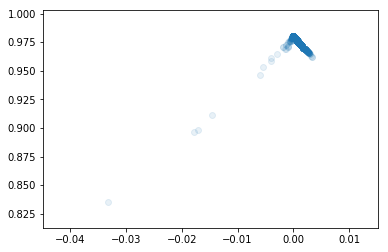

In [68]:
expr_filt = quant_std_df#[quant_std_df.mean(axis=1)>-0.005]
print(expr_filt.shape[0])

genedata = pd.DataFrame({"gene": expr_filt.index, "mean": expr_filt.mean(axis=1), "var": expr_filt.var(axis=1)})
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(genedata["mean"], genedata["var"], alpha=0.1)

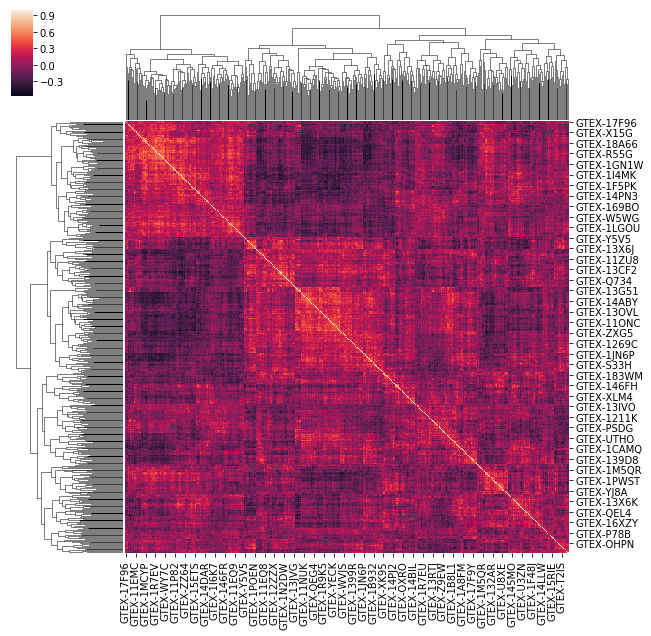

In [69]:
sample_corr = expr_filt.corr()
import seaborn as sns
sns.clustermap(sample_corr)

In [62]:
sample_corr

,GTEX-111FC,GTEX-111VG,GTEX-1122O,GTEX-1128S,GTEX-113JC,GTEX-117XS,GTEX-117YW,GTEX-1192W,GTEX-1192X,GTEX-11DXX,...,GTEX-ZVZP,GTEX-ZWKS,GTEX-ZXES,GTEX-ZXG5,GTEX-ZYFD,GTEX-ZYFG,GTEX-ZYT6,GTEX-ZYY3,GTEX-ZZ64,GTEX-ZZPT
GTEX-111FC,1.000000,0.001713,0.367093,-0.093421,-0.230925,0.347425,-0.127054,0.008335,-0.209778,-0.140176,...,0.166819,0.298808,0.221189,-0.031306,0.042746,0.086147,0.493015,-0.186446,0.040675,-0.339439
GTEX-111VG,0.001713,1.000000,0.003385,0.011798,0.234633,0.026467,0.287487,0.317725,-0.016363,0.018272,...,-0.124324,-0.063165,-0.000888,-0.114663,-0.010427,-0.181449,-0.016841,0.115851,-0.212340,0.024608
GTEX-1122O,0.367093,0.003385,1.000000,-0.018828,-0.271186,0.132923,-0.230657,-0.073325,-0.230445,0.025350,...,0.463661,0.254552,0.319825,0.038524,-0.042987,0.242184,0.336368,-0.022951,0.119705,-0.233747
GTEX-1128S,-0.093421,0.011798,-0.018828,1.000000,0.052087,0.097296,-0.188252,0.063009,-0.089213,0.085099,...,0.250899,0.149207,0.227069,0.234873,-0.108112,0.313528,-0.189309,0.335672,0.039737,0.001231
GTEX-113JC,-0.230925,0.234633,-0.271186,0.052087,1.000000,0.017744,0.182058,0.225072,0.008149,-0.051784,...,-0.232437,-0.179603,-0.141482,-0.004462,-0.016891,-0.177053,-0.127522,0.089337,-0.103530,-0.019760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYFG,0.086147,-0.181449,0.242184,0.313528,-0.177053,0.329880,-0.359738,-0.161298,0.022439,0.169144,...,0.376842,0.250822,0.510083,0.300750,-0.282367,1.000000,-0.047812,0.338091,0.147577,-0.045063
GTEX-ZYT6,0.493015,-0.016841,0.336368,-0.189309,-0.127522,0.229073,-0.330385,0.007546,-0.253346,-0.255489,...,0.149051,0.259671,0.106348,0.151765,0.043335,-0.047812,1.000000,-0.187568,0.164451,-0.334979
GTEX-ZYY3,-0.186446,0.115851,-0.022951,0.335672,0.089337,0.176778,-0.119289,0.160738,-0.104891,0.081961,...,0.094088,-0.019724,0.189342,0.328297,-0.288419,0.338091,-0.187568,1.000000,-0.087942,-0.007003
GTEX-ZZ64,0.040675,-0.212340,0.119705,0.039737,-0.103530,0.068393,-0.335915,-0.251021,-0.011679,0.055065,...,0.274169,0.212022,0.147793,0.172780,-0.065061,0.147577,0.164451,-0.087942,1.000000,-0.083618


In [90]:
factors = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Adipose-Subcutaneous_Euro/Adipose-Subcutaneous-peer_factors.tsv', sep='\t')


In [94]:
residuals = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Adipose-Subcutaneous_Euro/Adipose-Subcutaneous-peer_residuals.tsv', sep='\t', nrows=1)

In [91]:
factors

,V1,V2,V3,V4,V5,V6
1,1,-0.017783,0.037828,-0.016775,-0.019147,-0.026668
2,1,0.051381,0.004717,0.040231,0.007127,-0.042169
3,1,0.027071,0.058851,-0.099670,0.001806,0.046551
4,1,-0.026756,-0.028544,0.003093,0.036479,0.021099
5,1,-0.043377,0.029210,0.010353,0.043042,0.020656
...,...,...,...,...,...,...
487,1,0.021575,0.049606,0.046812,0.015882,-0.007345
488,1,-0.015650,0.003991,-0.087482,-0.099810,-0.036050
489,1,-0.037558,-0.001253,-0.032495,-0.024771,0.056263
490,1,-0.048207,-0.015595,0.052630,0.015747,-0.009759


In [97]:
residuals.columns

Index(['GTEX.111CU', 'GTEX.111FC', 'GTEX.111VG', 'GTEX.111YS', 'GTEX.1122O',
       'GTEX.1128S', 'GTEX.11DXX', 'GTEX.11DZ1', 'GTEX.11EI6', 'GTEX.11EM3',
       ...
       'GTEX.ZVT4', 'GTEX.ZVZP', 'GTEX.ZXES', 'GTEX.ZXG5', 'GTEX.ZYFD',
       'GTEX.ZYT6', 'GTEX.ZYVF', 'GTEX.ZYY3', 'GTEX.ZZ64', 'GTEX.ZZPU'],
      dtype='object', length=491)

In [98]:
factors.index = residuals.columns

In [102]:
factors = factors.drop(columns='V1')

In [104]:
factors.T

,GTEX.111CU,GTEX.111FC,GTEX.111VG,GTEX.111YS,GTEX.1122O,GTEX.1128S,GTEX.11DXX,GTEX.11DZ1,GTEX.11EI6,GTEX.11EM3,...,GTEX.ZVT4,GTEX.ZVZP,GTEX.ZXES,GTEX.ZXG5,GTEX.ZYFD,GTEX.ZYT6,GTEX.ZYVF,GTEX.ZYY3,GTEX.ZZ64,GTEX.ZZPU
V2,-0.017783,0.051381,0.027071,-0.026756,-0.043377,-0.034936,-0.070117,-0.001000,0.037362,-0.055459,...,-0.000301,-0.012226,-0.051106,0.039754,0.020892,0.021575,-0.015650,-0.037558,-0.048207,-0.030317
V3,0.037828,0.004717,0.058851,-0.028544,0.029210,-0.019174,0.026012,-0.006752,0.006696,0.004370,...,0.015544,0.033902,0.000656,-0.011242,0.001602,0.049606,0.003991,-0.001253,-0.015595,-0.013063
V4,-0.016775,0.040231,-0.099670,0.003093,0.010353,-0.039203,-0.008575,-0.029633,0.029794,0.035461,...,-0.060896,0.042758,0.032881,0.030635,0.000538,0.046812,-0.087482,-0.032495,0.052630,-0.001964
V5,-0.019147,0.007127,0.001806,0.036479,0.043042,0.024430,-0.010369,-0.047663,0.042331,-0.011492,...,-0.001766,-0.059040,0.070608,0.038578,-0.112135,0.015882,-0.099810,-0.024771,0.015747,0.057753
V6,-0.026668,-0.042169,0.046551,0.021099,0.020656,0.004497,-0.037924,-0.060503,-0.042591,-0.014543,...,0.072461,0.007900,0.011479,0.001939,0.001599,-0.007345,-0.036050,0.056263,-0.009759,0.005374
